# Figure 1: Methodology Schematic

**Goal**: Create a visual explanation of the marginalization approach.

The figure should show:
1. Single seed → Fixed P0 hand
2. Multiple opponent configurations (marginalization)
3. Oracle computation of V for each config
4. Aggregation to E[V] and σ(V)

In [1]:
# === CONFIGURATION ===
PROJECT_ROOT = "/home/jason/v2/mk5-tailwind"

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

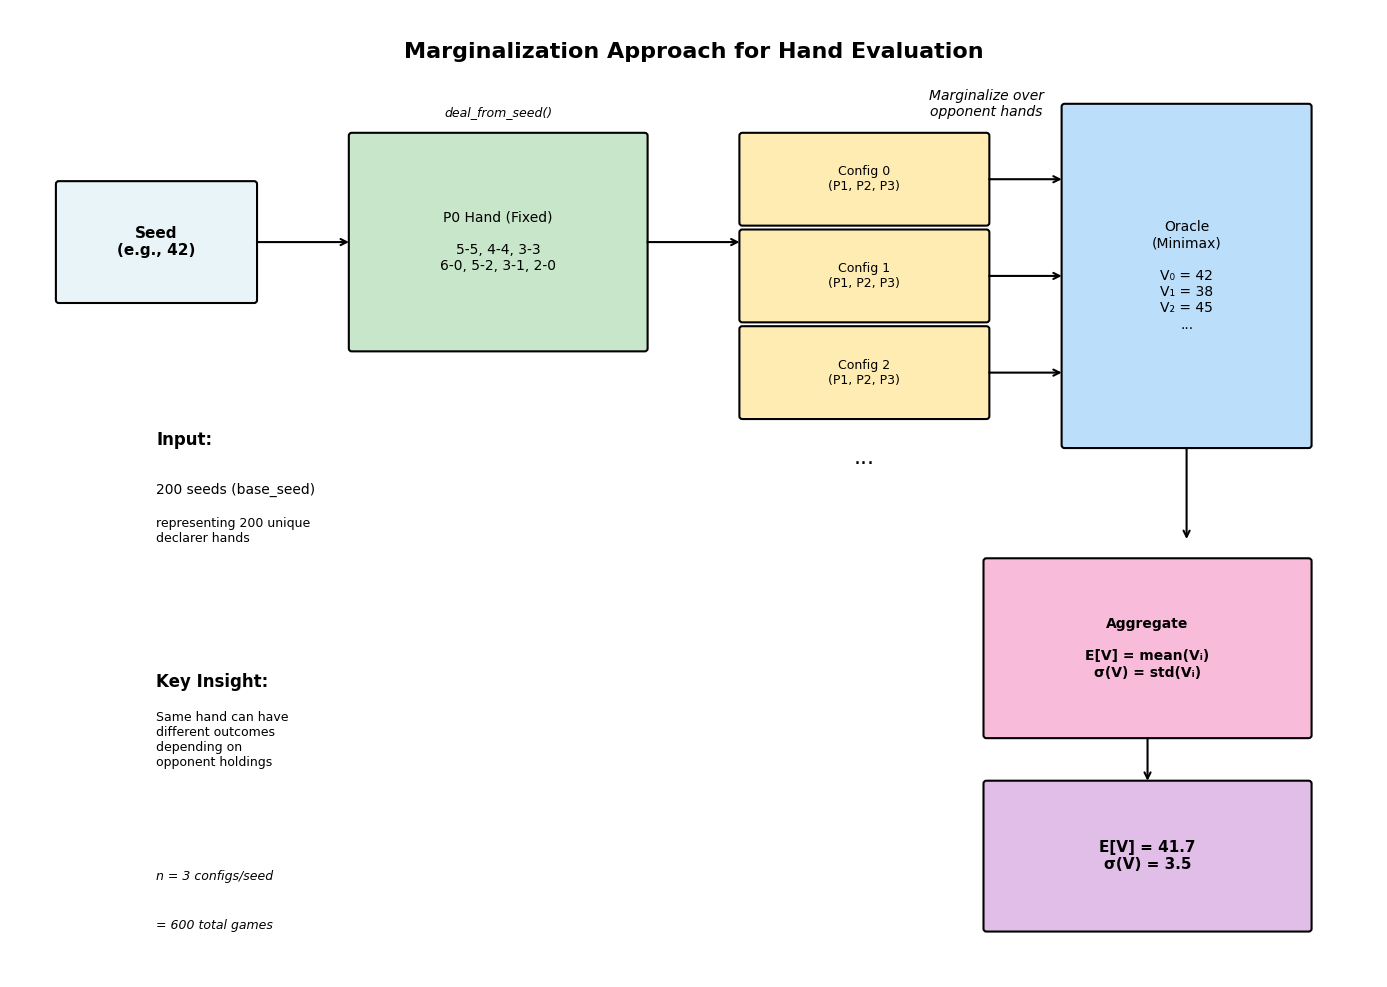

In [2]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.axis('off')

# Colors
color_seed = '#E8F4F8'
color_hand = '#C8E6C9'
color_opp = '#FFECB3'
color_oracle = '#BBDEFB'
color_output = '#F8BBD9'

# Helper function for boxes
def draw_box(x, y, w, h, text, color, fontsize=10, bold=False):
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.03", 
                         facecolor=color, edgecolor='black', linewidth=1.5)
    ax.add_patch(box)
    weight = 'bold' if bold else 'normal'
    ax.text(x + w/2, y + h/2, text, ha='center', va='center', 
            fontsize=fontsize, fontweight=weight, wrap=True)

# Helper for arrows
def draw_arrow(start, end, color='black'):
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle='->', color=color, lw=1.5))

# Title
ax.text(7, 9.5, 'Marginalization Approach for Hand Evaluation', 
        fontsize=16, fontweight='bold', ha='center')

# Step 1: Seed
draw_box(0.5, 7, 2, 1.2, 'Seed\n(e.g., 42)', color_seed, fontsize=11, bold=True)

# Arrow to hand
draw_arrow((2.5, 7.6), (3.5, 7.6))

# Step 2: Fixed P0 Hand
draw_box(3.5, 6.5, 3, 2.2, 'P0 Hand (Fixed)\n\n5-5, 4-4, 3-3\n6-0, 5-2, 3-1, 2-0', 
         color_hand, fontsize=10, bold=False)
ax.text(5, 8.9, 'deal_from_seed()', fontsize=9, ha='center', style='italic')

# Arrow to marginalization
draw_arrow((6.5, 7.6), (7.5, 7.6))

# Step 3: Opponent configurations (fan out)
ax.text(10, 8.9, 'Marginalize over\nopponent hands', fontsize=10, ha='center', style='italic')

# Multiple opponent configs
opp_y = [7.8, 6.8, 5.8]
opp_labels = ['Config 0\n(P1, P2, P3)', 'Config 1\n(P1, P2, P3)', 'Config 2\n(P1, P2, P3)']
for i, (y, label) in enumerate(zip(opp_y, opp_labels)):
    draw_box(7.5, y, 2.5, 0.9, label, color_opp, fontsize=9)
    # Arrows to oracle
    draw_arrow((10, y + 0.45), (10.8, y + 0.45))

# Dots for more configs
ax.text(8.75, 5.3, '...', fontsize=16, ha='center')

# Step 4: Oracle (minimax)
draw_box(10.8, 5.5, 2.5, 3.5, 'Oracle\n(Minimax)\n\nV₀ = 42\nV₁ = 38\nV₂ = 45\n...', 
         color_oracle, fontsize=10)

# Arrow to aggregation
draw_arrow((12.05, 5.5), (12.05, 4.5))

# Step 5: Aggregation
draw_box(10, 2.5, 3.3, 1.8, 'Aggregate\n\nE[V] = mean(Vᵢ)\nσ(V) = std(Vᵢ)', 
         color_output, fontsize=10, bold=True)

# Final output box
draw_box(10, 0.5, 3.3, 1.5, 'E[V] = 41.7\nσ(V) = 3.5', 
         '#E1BEE7', fontsize=11, bold=True)
draw_arrow((11.65, 2.5), (11.65, 2.0))

# Annotations
ax.text(1.5, 5.5, 'Input:', fontsize=12, fontweight='bold')
ax.text(1.5, 5, '200 seeds (base_seed)', fontsize=10)
ax.text(1.5, 4.5, 'representing 200 unique\ndeclarer hands', fontsize=9)

ax.text(1.5, 3, 'Key Insight:', fontsize=12, fontweight='bold')
ax.text(1.5, 2.2, 'Same hand can have\ndifferent outcomes\ndepending on\nopponent holdings', fontsize=9, wrap=True)

# Sample size annotation
ax.text(1.5, 1, 'n = 3 configs/seed', fontsize=9, style='italic')
ax.text(1.5, 0.5, '= 600 total games', fontsize=9, style='italic')

plt.tight_layout()
plt.savefig('../../results/figures/fig1_methodology.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('../../results/figures/fig1_methodology.pdf', bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

## Key Elements

The methodology figure shows:

1. **Input**: A seed determines P0's fixed hand
2. **Marginalization**: Multiple opponent configurations sampled
3. **Oracle**: Perfect minimax play computed for each config
4. **Aggregation**: Mean and variance across configurations

### Output Files

- `results/figures/fig1_methodology.png` - PNG (300 DPI)
- `results/figures/fig1_methodology.pdf` - Vector format